In [2]:
import pandas as pd
import numpy as np
import pylab as plt

In [3]:
df_images = pd.read_csv('../data/ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('../data/ProstateX-TrainingLesionInformationv2/ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv')

# PROSTATEx

# Data overview

##### All studies included T2-weighted (T2W), proton density-weighted (PD-W), dynamic contrast enhanced (DCE), and diffusion-weighted (DW) imaging.

The images come in two encodings. The acquired MR is provided in DICOM encoding. Additionally Ktrans images are provided. They come in mhd format. Ktrans is a key pharmacokinetic parameter computed from the available Dynamic contrast enhanced T1-weighted series. Each patient has one study with several DICOM images and one Ktrans image.

Basic overview of two documents which come with informations about MRI images in dataset and documented findings. 


## MRI
[Source link](https://radiopaedia.org/articles/mri-sequences-overview)

### T2W

T2 weighted sequences are part of almost all MRI protocols. Without modification the dominant signal intensities of different tissues are:

* fluid (e.g. urine, CSF): high signal intensity (white)
* muscle: intermediate signal intensity (grey)
* fat: high signal intensity (white)
Brain
* grey matter: intermediate signal intensity (grey)
* white matter: hypointense compared to grey matter (dark-ish)

#### TSE

Fast or turbo spin echo (FSE/TSE) is an adaptation of conventional spin-echo (SE) acquisition technique designed to reduce imaging time. It has largely supplanted the original spin-echo technique due to vastly improved imaging speed.
[Source link](https://radiopaedia.org/articles/fast-spin-echo)

ther limitations of FSE include overly bright signals from fat on T2-weighted images and overly bright CSF on spin-density-weighted images. 
[Source link](http://mriquestions.com/what-is-fsetse.html)

### PD-W (proton density-weighted)

Given that nuclear magnetic resonance of protons (hydrogen ions) forms the major basis of MRI, it is not surprising that signal can be weighted to reflect the actual density of protons; an intermediate sequence sharing some features of both T1 and T2.

Proton density images were extensively used for brain imaging, however they have largely been replaced by FLAIR. PD however continues to offer excellent signal distinction between fluid, hyaline cartilage and fibrocartilage, which makes this sequence ideal in the assessment of joints. 

The dominant signal intensities of different tissues are:

* fluid (e.g. joint fluid, CSF): high signal intensity (white)
* muscle: intermediate signal intensity (grey)
* fat: high signal intensity (white)
* hyaline cartilage: intermediate signal intensity (grey)
* fibrocartilage: low signal intensity (black)

### DCE (dynamic contrast enhanced)

Dynamic contrast-enhanced (DCE) MR perfusion, sometimes also referred to as permeability MRI, is one of the main MRI perfusion techniques which calculates perfusion parameters by evaluating T1 shortening induced by a gadolinium-based contrast bolus passing through tissue. 

### K-trans

K trans is a measure of capillary permeability obtained using dynamic contrast-enhanced (DCE) MR perfusion. It is calculated by measuring the accumulation of gadolinium-based contrast agent in the extravascular-extracellular space. 

Increased permeability of vessels in the brain is seen in a variety of conditions:

* glioma: VEGF produced by the tumour reduces the effectiveness of gap junction and creates fenestrations in the endothelium of brain capillaries; this has been shown to correlate with tumour grade 1
* cerebral metastases, which lack blood brain barrier and resemble the vascularity of the parent tissue
* inflammatory lesions (e.g. demyelinating plaques of multiple sclerosis)

It should be noted that how ktrans is interpreted varied according to permeability and blood flow. In situations where permeability is very low (near-intact blood brain barrier) then ktrans is a useful measure of permeability, whereas in situations where permeability is very high (disrupted blood brain barrier) then ktrans will reflect blood flow 3. 

### DW (diffusion-weighted imaging)

Diffusion weighted imaging assess the ease with which water molecules move around within a tissue (mostly representing fluid within the extracellular space) and gives insight into cellularity (e.g. tumours), cell swelling (e.g. ischaemia) and oedema.

The dominant signal intensities of different tissues are:

fluid (e.g. urine, CSF): no restriction to diffusion
soft tissues (muscle, solid organs, brain): intermediate diffusion
fat: little signal due to paucity of water
Typically you will find three sets of images when diffusion weighted imaging is performed: DWI, ADC and B=0 images.

#### DWI
When we say "DWI" we usually are referring to what is in better terms an isotropic T2 weighted map as it represents the combination of actual diffusion values and T2 signal.

It is a relatively low resolution image with the following appearance:

* grey matter: intermediate signal intensity (grey)
* white matter: slightly hypointense compared to grey matter
* CSF: low signal (black)
* fat: little signal due to paucity of water
* other soft tissues: intermediate signal intensity (grey)
Acute pathology (ischaemic stroke, cellular tumour, pus) usually appears as increased signal denoting restricted diffusion. However (and importantly), because there is a component of the image derived from T2 signal, some tissues that are bright on T2 will appear bright on DWI images without there being an abnormal restricted diffusion. This phenomenon is known as T2 shine through.

#### ADC
Apparent diffusion coefficient maps (ADC) are images representing the actual diffusion values of the tissue without T2 effects. They are therefore much more useful, and objective measures of diffusion values can be obtained, however they are much less pretty to look at. They appear basically as grayscale inverted DWI images.

They are relatively low resolution images with the following appearances:

* grey matter: intermediate signal intensity (grey)
* white matter: slightly hyperintense compared to grey matter
* CSF: high signal (white)
* fat: little signal due to paucity of water
* other soft tissues: intermediate signal intensity (grey)
* Acute pathology (ischaemic stroke, cellular tumour, pus) usually appears as decreased signal denoting restricted diffusion.

#### B=0
If you see these, do not worry. They are only used to calculate ADC values. They are essentially T2 weighted images with a bit of susceptibility effects.

## sag-tra-cor
[Source](https://www.machinedesign.com/medical/what-s-difference-between-sagittal-coronal-and-transverse-planes)

The **sagittal** or lateral plane dives the body into left and right halves and is an x-z plane. Technically, the sagittal or median plane goes right through the middle between the body’s left and right halves. Planes parallel the sagittal planes are called parasagittal planes. It is called the sagittal plane because it goes through or is parallel to the sagittal suture, the line running along the top of the skull that marks where the left and right halves of the skull grew together.

The **coronal** or frontal planes divide the body into front and back (also called dorsal and ventral or posterior and anterior) sections and are x-y planes.

The **transvers** planes, also known as the axial or horizontal planes, are parallel to the ground and divide the body into top and bottom parts. The top and bottom sections also called the superior and inferior section s or the cranial (head) and caudal (tial) sections). They are x-z planes.


![alt text](images/Even_Smaller.png)

## Dataset

* T2W fast spin echo
* diffusion-weighted single-shotecho planar imaging


#### Image informations

### Images head explanation

* ProxID – ProstateX patient identifier 
* Name – Series description 
* fid – Finding ID
* Pos – Scanner coordinate position of the finding
* WorldMatrix – Matrix describing image orientation and scaling
* ijk – Image column (i),row (j), and slice (k) coordinates of the finding.  Using the VTK/ITK/Python array convention, (0,0,0) represents the first column and first row of the first slice.
* TopLevel
 * 0 - Series forms one image
 * 1 – A set of series forms a 4D image (e.g. Dynamic MR)
 * NA – Series form one image, but is part of a Level 1 4D image
* SpacingBetweenSlices – Scalar spacing between slices
* VoxelSpacing – Vector with x,y,z spacing scalars
* Dim – Vector with 4D dimensions of the image 
* DCMSerDescr – Original DICOM series description
* DCMSerNum – DICOM series number

In [4]:
df_images.dtypes

ProxID                   object
Name                     object
fid                       int64
pos                      object
WorldMatrix              object
ijk                      object
TopLevel                float64
SpacingBetweenSlices    float64
VoxelSpacing             object
Dim                      object
DCMSerDescr              object
DCMSerNum                 int64
dtype: object

In [5]:
df_images.head(5)

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8


### Findings head explanation

* ProxID – ProstateX patient identifier
* fid - Finding ID
* pos - Scanner coordinate position of the finding
* ClinSig – Identifier available in training set that identifies whether this is a clinically significant finding. Either the biopsy Gleason score was 7 or higher. Findings with a PIRADS score 2 were not biopsied and are not considered clinically significant. In our center the occurrence of clinically significant cancer in PIRADS 2 lesions is less than 5%.

In [6]:
df_findings.dtypes

ProxID     object
fid         int64
pos        object
zone       object
ClinSig      bool
dtype: object

In [7]:
df_findings.head(10)

,ProxID,fid,pos,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False
5,ProstateX-0003,2,-21.2871 19.3995 19.7429,TZ,False
6,ProstateX-0004,1,-7.69665 3.64226 23.1659,AS,False
7,ProstateX-0005,0,-14.5174331665039 49.4428329467773 20.78152465...,PZ,True
8,ProstateX-0005,1,-38.6276 42.2781 21.4084,PZ,True
9,ProstateX-0005,1,-22.0892639160156 25.4668045043945 22.87915420...,TZ,False


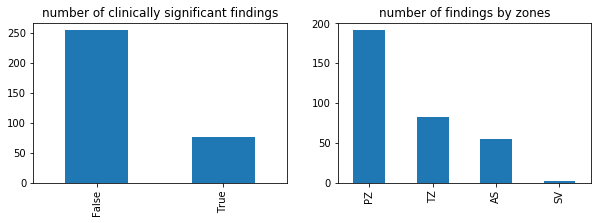

In [8]:
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_findings['ClinSig'].value_counts().plot(kind='bar', 
                                         title='number of clinically significant findings')
plt.subplot2grid(fig_dims, (0,1))
df_findings['zone'].value_counts().plot(kind='bar', 
                                         title='number of findings by zones')

In [9]:
pclass_xt = pd.crosstab(df_findings['zone'], df_findings['ClinSig'])
pclass_xt

ClinSig,False,True
zone,,
AS,24,31
PZ,155,36
SV,2,0
TZ,73,9


ep2d_diff_tra_DYNDIST                   795
t2_tse_tra                              412
t2_tse_sag                              358
t2_tse_cor                              339
tfl_3d PD ref_tra_1.5x1.5_t3            326
tfl_3d dynamisch fast                   315
ep2d_diff_tra_DYNDIST_ADC               265
ep2d_diff_tra_DYNDISTCALC_BVAL          265
ep2d_diff_tra_DYNDIST_MIX               192
t2_loc sag                              151
t2_localizer                            144
ep2d_diff_tra_DYNDIST_MIX_ADC            64
ep2d_diff_tra_DYNDIST_MIXCALC_BVAL       64
diffusie-3Scan-4bval_fs                  27
diffusie-3Scan-4bval_fsCALC_BVAL          9
diffusie-3Scan-4bval_fs_ADC               9
tfl_3d PD reference                       9
ep2d_diff_tra2x2_Noise0_FS_DYNDIST        6
t2_localizer_prostate                     4
ep2d_diff_tra2x2_Noise0_NoFS_DYNDIST      3
Name: DCMSerDescr, dtype: int64

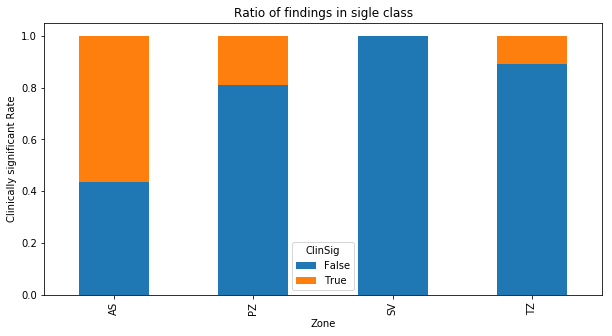

In [10]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Ratio of findings in sigle class')
plt.xlabel('Zone')
plt.ylabel('Clinically significant Rate')

df_images['DCMSerDescr'].value_counts().head(20)

## MRI modalities in dataset

In [14]:
df_images['Name'].value_counts().head(20)

t2_tse_tra0                            412
t2_tse_sag0                            358
t2_tse_cor0                            339
tfl_3d_PD_ref_tra_1_5x1_5_t30          326
tfl_3d_dynamisch_fast0                 315
ep2d_diff_tra_DYNDIST0                 265
ep2d_diff_tra_DYNDIST1                 265
ep2d_diff_tra_DYNDIST_ADC0             265
ep2d_diff_tra_DYNDIST2                 265
ep2d_diff_tra_DYNDISTCALC_BVAL0        265
t2_loc_sag0                            151
t2_localizer0                          144
ep2d_diff_tra_DYNDIST_MIX2              64
ep2d_diff_tra_DYNDIST_MIX_ADC0          64
ep2d_diff_tra_DYNDIST_MIXCALC_BVAL0     64
ep2d_diff_tra_DYNDIST_MIX0              64
ep2d_diff_tra_DYNDIST_MIX1              64
diffusie_3Scan_4bval_fs1                 9
diffusie_3Scan_4bval_fs2                 9
diffusie_3Scan_4bval_fsCALC_BVAL0        9
Name: Name, dtype: int64

In [34]:

df_images['DCMSerNum'].value_counts().head(20)

6     871
7     441
8     349
5     337
9     336
4     326
3     316
2     155
1     143
10    119
11     32
12     21
13     14
14     12
29     10
19     10
15     10
17     10
21     10
31     10
Name: DCMSerNum, dtype: int64